In [118]:
import numpy as np
from scipy import stats
import pandas as pd
import math 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.utils import resample
import statsmodels.stats.multitest as smt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [119]:
data = pd.read_excel('participant_files/train.xlsx')

In [120]:
data.head(10)

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,P03,S04,S07,S10,U01,U02,U03,U05,U06,survival_7_years
0,1,2005-06-01,4.0,T1c,N0,M0,I,86.0,4.0,66.0,...,0,0,0,0,0,0,1,0,0,0
1,2,2006-02-01,8.0,T3a,N1,M0,IV,66.0,2.0,70.0,...,0,0,1,0,0,0,0,0,1,0
2,3,2006-03-01,9.0,T1a,N0,M0,IIB,84.0,4.0,69.0,...,0,0,0,1,1,1,1,0,0,1
3,4,2005-02-01,8.0,T2b,N0,M0,IIB,86.0,3.0,69.0,...,0,0,0,1,1,1,0,0,0,0
4,5,2001-12-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,0,0,1,0,1,0,1,1,0,0
5,6,2001-07-01,3.0,T1a,N0,M0,IIA,75.0,4.0,69.0,...,0,0,0,1,0,1,1,0,0,1
6,7,2005-10-01,8.0,T1b,N0,M0,IIB,85.0,4.0,67.0,...,0,0,1,0,1,1,1,0,0,0
7,8,2005-12-01,8.0,T4,N0,M0,IV,78.0,4.0,70.0,...,0,0,0,0,1,1,1,0,0,0
8,9,2004-01-01,6.0,T3b,N0,M0,III,75.0,1.0,69.0,...,0,0,0,0,0,1,1,0,0,1
9,10,2004-11-01,7.0,T1a,N0,M0,IIA,83.0,2.0,68.0,...,0,0,1,0,1,1,1,0,0,1


In [121]:
df = data
df = df.drop('id',axis = 1)

In [122]:
df = df.drop(['height','weight','BMI'], axis = 1)

In [123]:
df.isna().sum().sort_values(ascending=False)

Obesity                 2567
smoker                  1586
family_history          1586
first_degree_history    1586
previous_cancer         1586
age                      748
gleason_score            320
tumor_diagnosis          303
race                     165
S07                        0
O11                        0
P01                        0
P02                        0
P03                        0
S04                        0
diagnosis_date             0
S10                        0
U01                        0
O09                        0
U02                        0
U03                        0
U05                        0
U06                        0
O10                        0
rad_rem                    0
O08                        0
O01                        0
survival_1_year            0
multi_thrpy                0
brch_thrpy                 0
cry_thrpy                  0
chm_thrpy                  0
h_thrpy                    0
rd_thrpy                   0
side          

In [124]:
df1 = df[df.survival_7_years != 0]
df0 = df[df.survival_7_years == 0]

In [125]:
df1.shape

(6651, 40)

In [126]:
df0.shape

(8734, 40)

In [127]:
null_count1 = pd.DataFrame(df1.isna().sum())
null_count0 = pd.DataFrame(df0.isna().sum())
null_classtable = pd.concat([null_count1, null_count0], axis = 1)
null_classtable.columns = ['Class1_null', 'Class0_null']
print(null_classtable)

                      Class1_null  Class0_null
diagnosis_date                  0            0
gleason_score                 147          173
t_score                         0            0
n_score                         0            0
m_score                         0            0
stage                           0            0
age                           314          434
race                           73           92
Obesity                      1070         1497
family_history                700          886
first_degree_history          700          886
previous_cancer               700          886
smoker                        700          886
side                            0            0
tumor_diagnosis               127          176
rd_thrpy                        0            0
h_thrpy                         0            0
chm_thrpy                       0            0
cry_thrpy                       0            0
brch_thrpy                      0            0
rad_rem      

In [128]:
test_df = pd.read_excel('participant_files/SiddarthaPadala_score.xlsx')

In [129]:
test_null = pd.DataFrame(test_df.isna().sum())

In [130]:
data_null = pd.DataFrame(data.isna().sum())

In [131]:
null_table = pd.concat([data_null, test_null], axis=1)
null_table.columns = ['data_null', 'test_null']

In [132]:
print(null_table)

                      data_null  test_null
id                            0          0
diagnosis_date                0          0
gleason_score               320        239
t_score                       0          0
n_score                       0          0
m_score                       0          0
stage                         0          0
age                         748        648
race                        165        121
height                     1364       1043
weight                     1317       1041
BMI                        2567       1987
Obesity                    2567       1987
family_history             1586       1171
first_degree_history       1586       1171
previous_cancer            1586       1171
smoker                     1586       1171
side                          0          0
tumor_diagnosis             303        210
rd_thrpy                      0          0
h_thrpy                       0          0
chm_thrpy                     0          0
cry_thrpy  

As the survival_1_year feature has null values in the test data and no null values in train data, we would not be able to predict the target variable for null values in test data. Therefore, we should drop this column from our analysis.

In [133]:
df_c = df.drop('survival_1_year', axis = 1)

In [134]:
df_c.isna().sum().sort_values(ascending = False)

Obesity                 2567
smoker                  1586
family_history          1586
first_degree_history    1586
previous_cancer         1586
age                      748
gleason_score            320
tumor_diagnosis          303
race                     165
S07                        0
O11                        0
P01                        0
P02                        0
P03                        0
S04                        0
diagnosis_date             0
S10                        0
U01                        0
O09                        0
U02                        0
U03                        0
U05                        0
U06                        0
O10                        0
brch_thrpy                 0
O08                        0
O01                        0
multi_thrpy                0
rad_rem                    0
cry_thrpy                  0
chm_thrpy                  0
h_thrpy                    0
rd_thrpy                   0
side                       0
stage         

In [135]:
df_c.dtypes

diagnosis_date          datetime64[ns]
gleason_score                  float64
t_score                         object
n_score                         object
m_score                         object
stage                           object
age                            float64
race                           float64
Obesity                        float64
family_history                 float64
first_degree_history           float64
previous_cancer                float64
smoker                         float64
side                            object
tumor_diagnosis                float64
rd_thrpy                         int64
h_thrpy                          int64
chm_thrpy                        int64
cry_thrpy                        int64
brch_thrpy                       int64
rad_rem                          int64
multi_thrpy                      int64
O01                              int64
O08                              int64
O09                              int64
O10                      

In [136]:
def replace_age(val):
    if val <= 45:
        return 1
    elif val > 45 and val < 60:
        return 2
    elif val >=60 and val < 75:
        return 3
    elif val >= 75:
        return 4
    else:
        return val

df_c['age_group'] = df_c['age'].apply(replace_age)

In [369]:
# df_c['age_group1'] = 0
# df_c['age_group2'] = 0
# df_c['age_group3'] = 0
# df_c['age_group4'] = 0

# df_c.loc[df_c['age'] <= 45, 'age_group1'] = 1
# df_c.loc[(df_c['age'] > 45) & (df_c['age'] <= 60), 'age_group2'] = 1
# df_c.loc[(df_c['age'] > 60) & (df_c['age'] <= 75), 'age_group3'] = 1
# df_c.loc[df_c['age'] > 75, 'age_group4'] = 1

In [137]:
df_c.columns

Index(['diagnosis_date', 'gleason_score', 't_score', 'n_score', 'm_score',
       'stage', 'age', 'race', 'Obesity', 'family_history',
       'first_degree_history', 'previous_cancer', 'smoker', 'side',
       'tumor_diagnosis', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy',
       'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10',
       'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03',
       'U05', 'U06', 'survival_7_years', 'age_group'],
      dtype='object')

In [138]:
df_c = df_c.drop('age', axis = 1)

In [139]:
df_clean = df_c[['tumor_diagnosis', 'survival_7_years']].dropna()
group1 = df_clean.loc[df_clean['survival_7_years'] == 0, 'tumor_diagnosis']
group2 = df_clean.loc[df_clean['survival_7_years'] == 1, 'tumor_diagnosis']

    # Perform the two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)
    
print(t_stat)
print(p_value)


11.771977006055414
7.503669578708669e-32


In [140]:
def replace_gleason_score(val):
    if val < 7:
        return 1
    elif val >= 7 and val < 8:
        return 2
    elif val >=8 and val < 9:
        return 3
    elif val >= 9:
        return 4
    else:
        return val

df_c['gleason_grade'] = df_c['gleason_score'].apply(replace_gleason_score)

In [141]:
def replace_first_degree_history(val):
    if val > 2:
        return 2
    else:
        return val

df_c['first_degree_history'] = df_c['first_degree_history'].apply(replace_first_degree_history)

In [142]:
def replace_family_history(val):
    if val > 3:
        return 3
    else:
        return val

df_c['family_history'] = df_c['family_history'].apply(replace_family_history)

In [143]:
num_cols = ['tumor_diagnosis']
cat_cols = ['gleason_score', 't_score', 'n_score', 'm_score','stage', 'race', 'Obesity', 'family_history',
            'first_degree_history', 'previous_cancer', 'smoker', 'side', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 
            'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 
            'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'age_group','gleason_grade']

In [144]:
df_c.columns

Index(['diagnosis_date', 'gleason_score', 't_score', 'n_score', 'm_score',
       'stage', 'race', 'Obesity', 'family_history', 'first_degree_history',
       'previous_cancer', 'smoker', 'side', 'tumor_diagnosis', 'rd_thrpy',
       'h_thrpy', 'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem',
       'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03',
       'S04', 'S07', 'S10', 'U01', 'U02', 'U03', 'U05', 'U06',
       'survival_7_years', 'age_group', 'gleason_grade'],
      dtype='object')

In [ ]:
nrows = 10
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 50))
fig.subplots_adjust(hspace=0.5)

# Flatten the axis array to make it easier to iterate over
axs = axs.flatten()

# Loop over each column in the DataFrame and create a count plot
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_c, ax=axs[i])
    axs[i].set_title(col)
    # Add counts on top of each bar
    for p in axs[i].patches:
        axs[i].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+5))

# Hide any remaining empty subplots
for i in range(len(df_c.columns), nrows*ncols):
    axs[i].axis('off')

plt.show()

In [146]:
def chi_squared_test(df, independent_var, target_var):
    """
    Perform a chi-squared test for independence between a categorical independent variable
    and a binary target variable.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        independent_var (str): The name of the column containing the independent variable.
        target_var (str): The name of the column containing the binary target variable.

    Returns:
        A tuple containing the chi-squared statistic, the p-value, the degrees of freedom, and
        the expected frequencies for each level of the independent variable.
    """
    df_clean = df[[independent_var, target_var]].dropna()
    # Create a contingency table of the two variables
    contingency_table = pd.crosstab(df_clean[independent_var], df_clean[target_var])

    # Perform the chi-squared test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Return the results of the chi-squared test
    return chi2, p_value, dof, expected

In [147]:
target_var = 'survival_7_years'

# Iterate over each column in the DataFrame, and perform the chi-squared test on each categorical column
chi2_results = []
for col in cat_cols:
  chi2, p_value, dof, expected = chi_squared_test(df_c, col, target_var)
  chi2_results.append((col, chi2, p_value, dof))

# Convert the results to a DataFrame and print the table
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi-Squared', 'P-Value', 'Degrees of Freedom'])
print(chi2_results_df)

                  Column  Chi-Squared        P-Value  Degrees of Freedom
0          gleason_score   441.973316   1.076126e-88                  10
1                t_score   169.063670   9.668435e-32                   9
2                n_score   869.336301  1.682755e-189                   2
3                m_score   379.792151   5.272716e-82                   3
4                  stage   698.852773  6.175118e-150                   4
5                   race    14.741022   2.051886e-03                   3
6                Obesity    12.939614   3.217013e-04                   1
7         family_history     3.686167   2.974074e-01                   3
8   first_degree_history     9.306678   9.529728e-03                   2
9        previous_cancer     5.577015   1.819771e-02                   1
10                smoker     0.766161   3.814072e-01                   1
11                  side     0.768288   6.810332e-01                   2
12              rd_thrpy   267.649264   3.691901e-6

In [148]:
df_c = df_c.drop(['family_history','side','O11','S04','S07','U01','U02','U03',
                  'U06','gleason_score','t_score','m_score','n_score'],axis = 1)

In [149]:
df_c.isna().sum().sort_values(ascending = False)

Obesity                 2567
first_degree_history    1586
previous_cancer         1586
smoker                  1586
age_group                748
gleason_grade            320
tumor_diagnosis          303
race                     165
O09                        0
survival_7_years           0
U05                        0
S10                        0
P03                        0
P02                        0
P01                        0
O10                        0
diagnosis_date             0
O08                        0
O01                        0
multi_thrpy                0
stage                      0
brch_thrpy                 0
cry_thrpy                  0
chm_thrpy                  0
h_thrpy                    0
rd_thrpy                   0
rad_rem                    0
dtype: int64

In [150]:
df_c.columns

Index(['diagnosis_date', 'stage', 'race', 'Obesity', 'first_degree_history',
       'previous_cancer', 'smoker', 'tumor_diagnosis', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01',
       'O08', 'O09', 'O10', 'P01', 'P02', 'P03', 'S10', 'U05',
       'survival_7_years', 'age_group', 'gleason_grade'],
      dtype='object')

/Users/siddartha/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


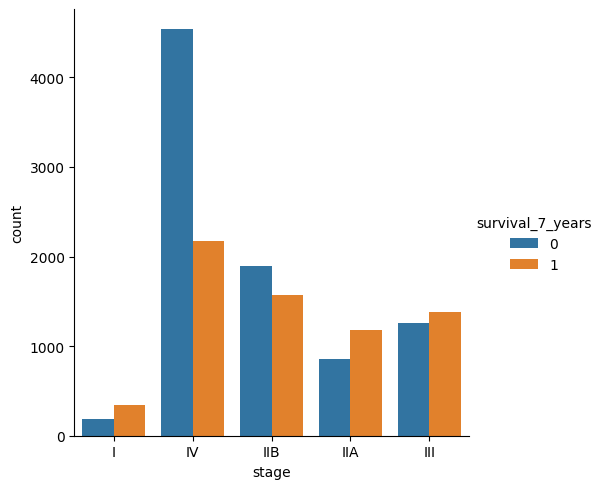

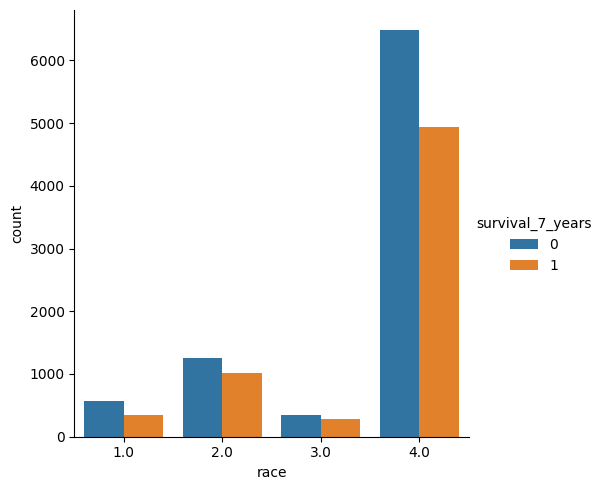

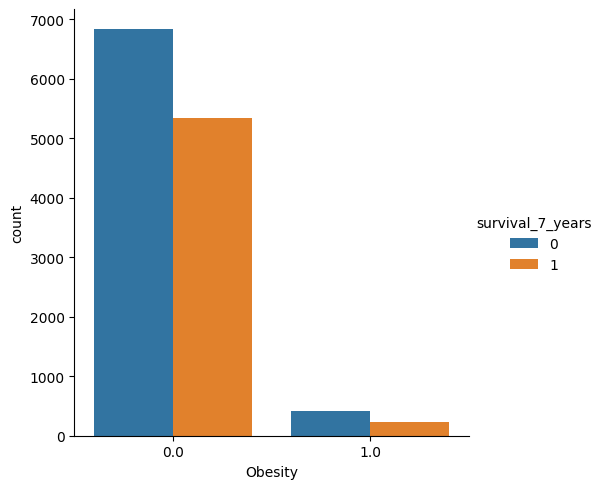

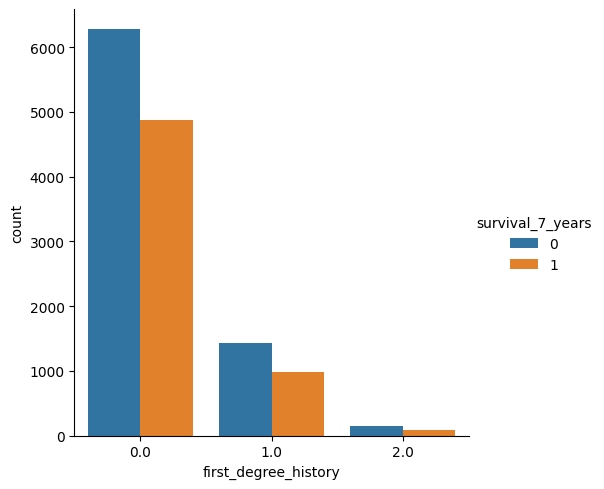

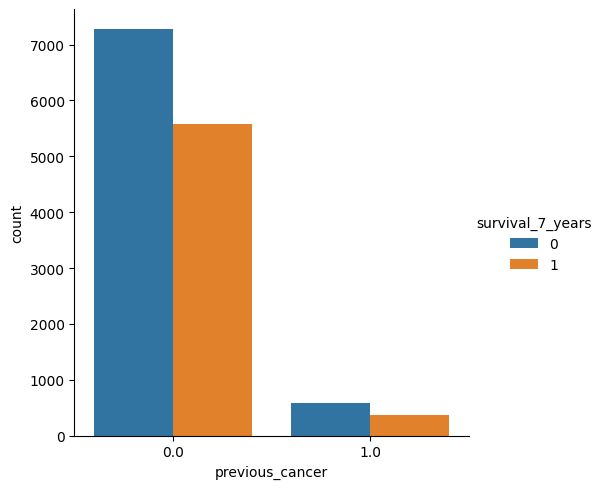

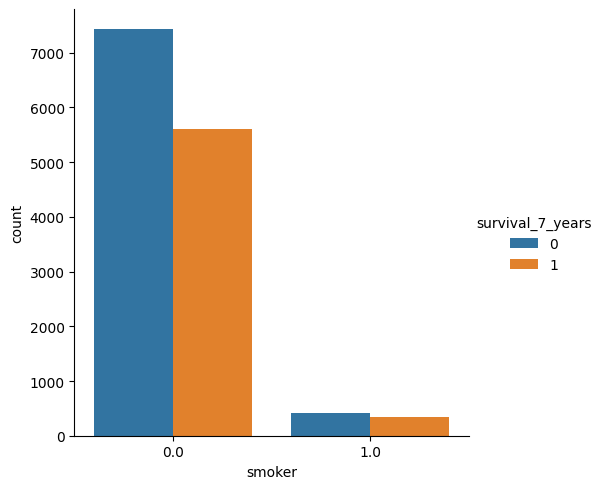

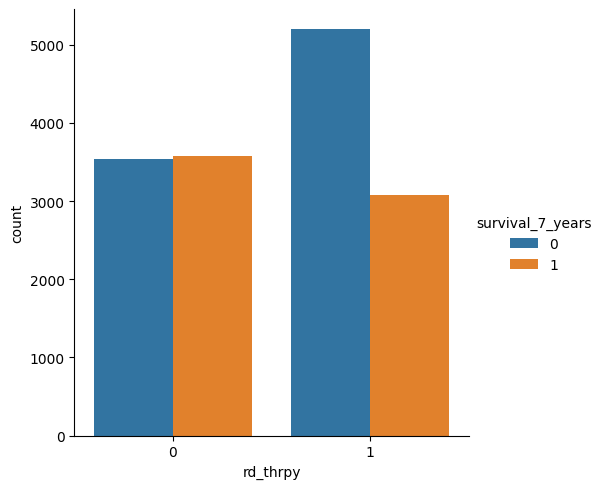

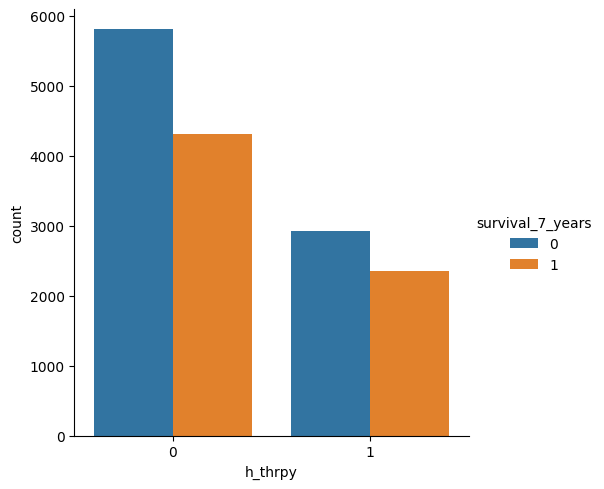

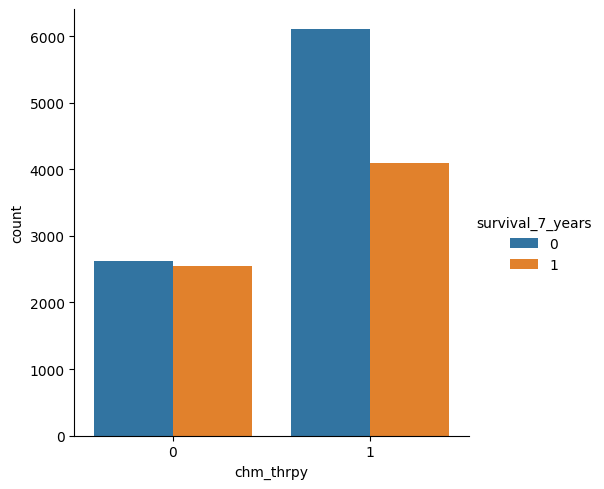

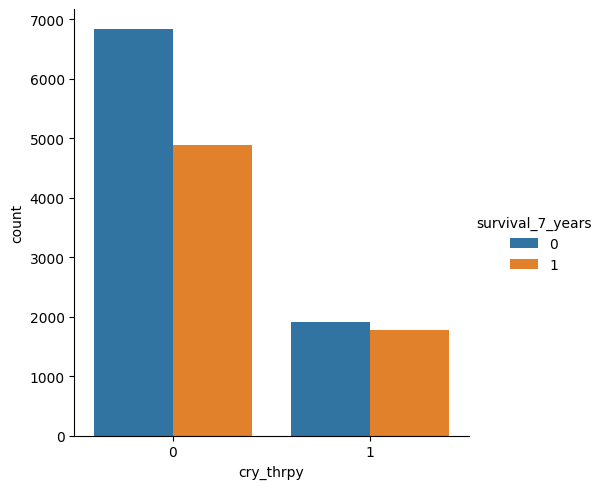

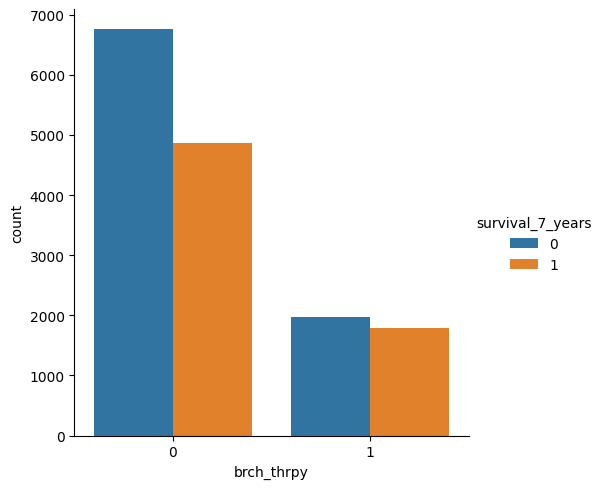

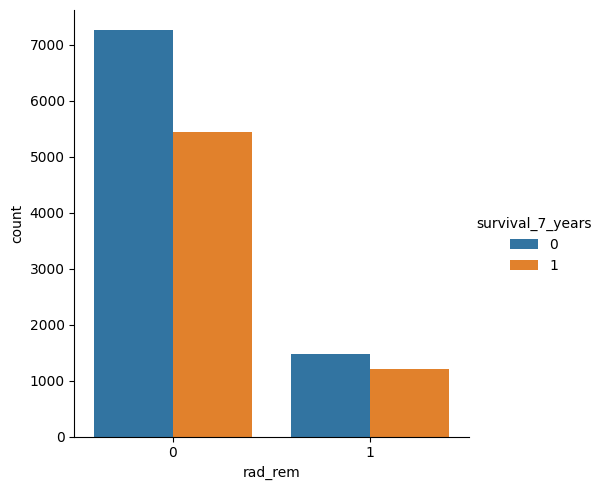

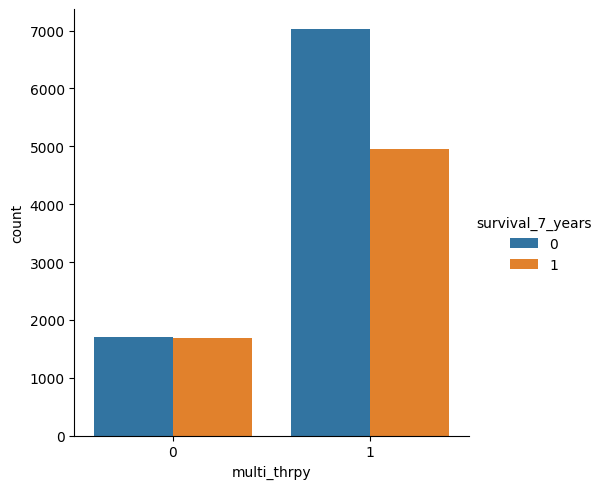

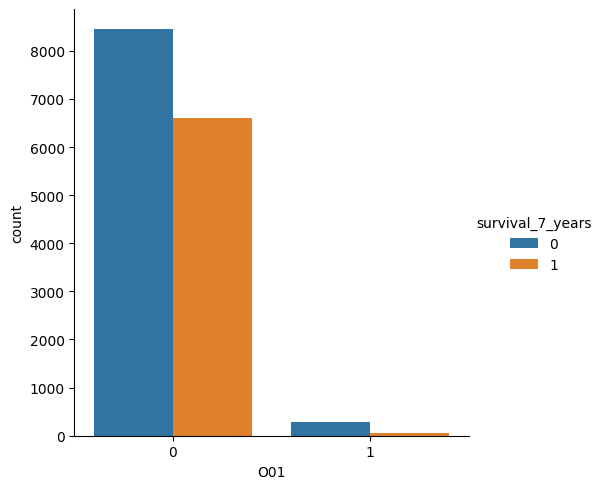

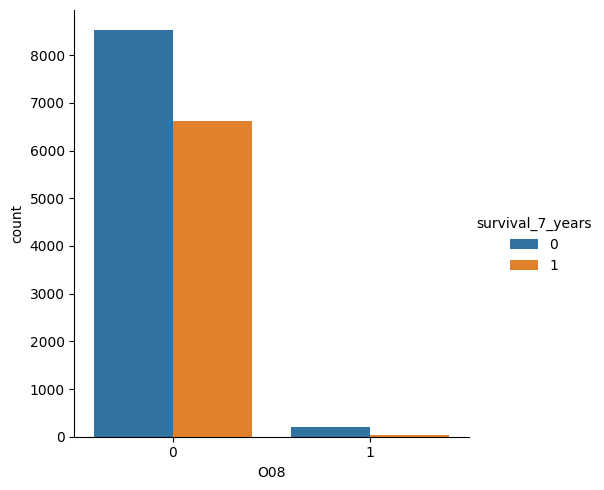

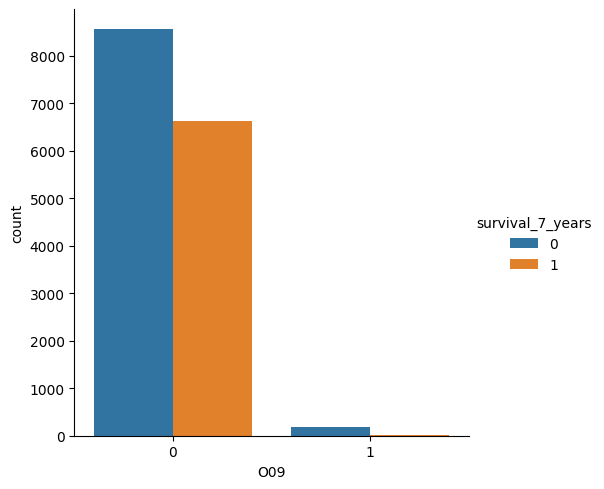

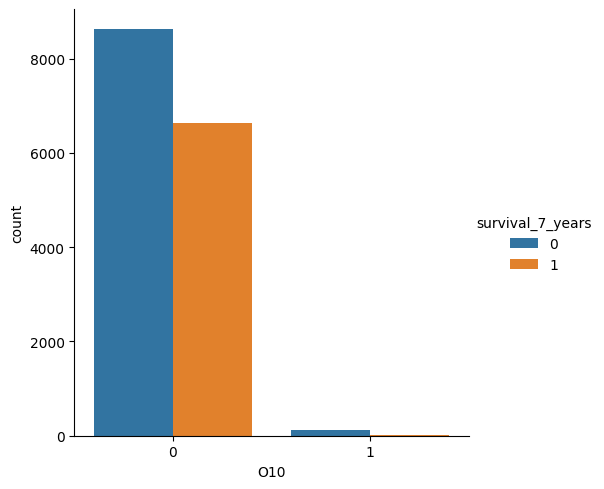

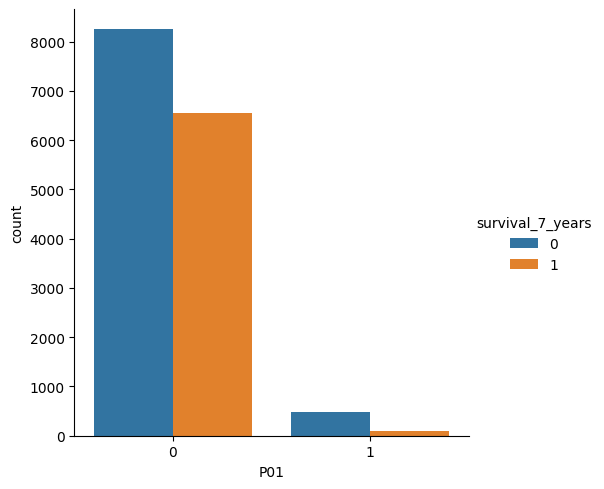

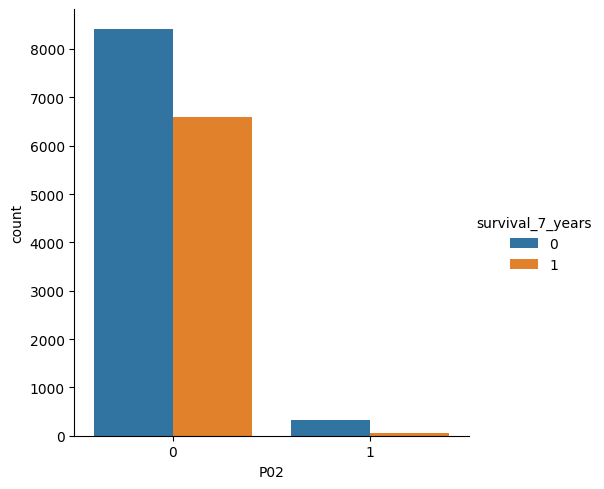

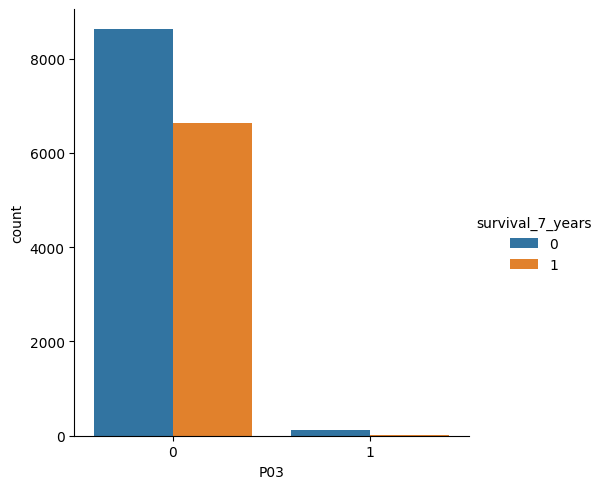

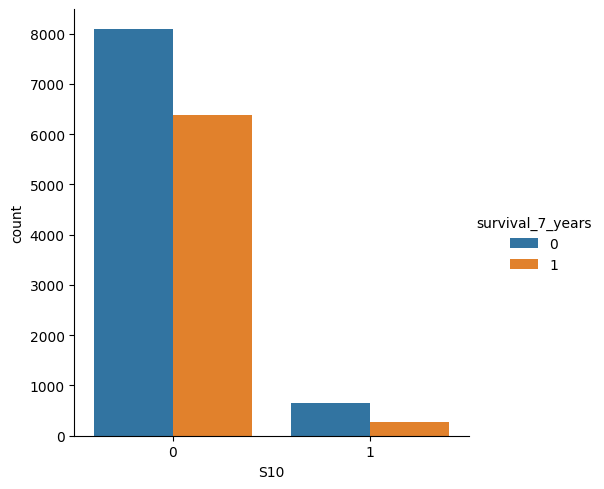

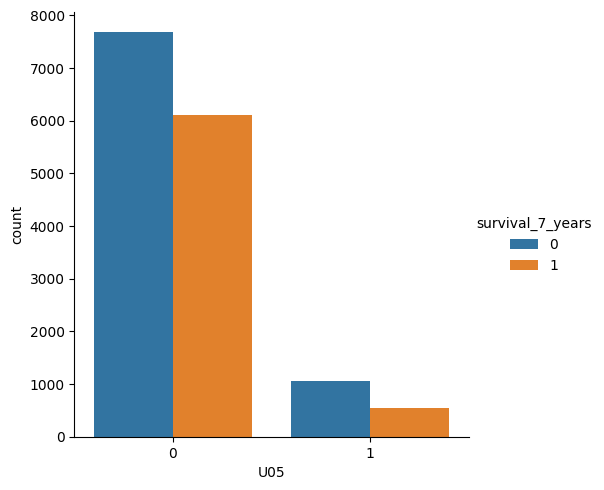

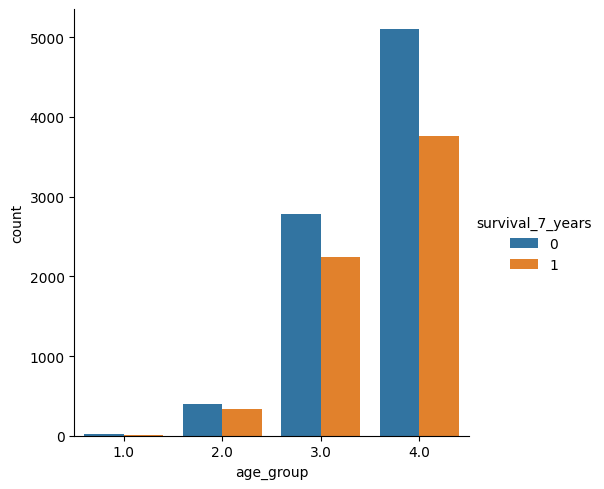

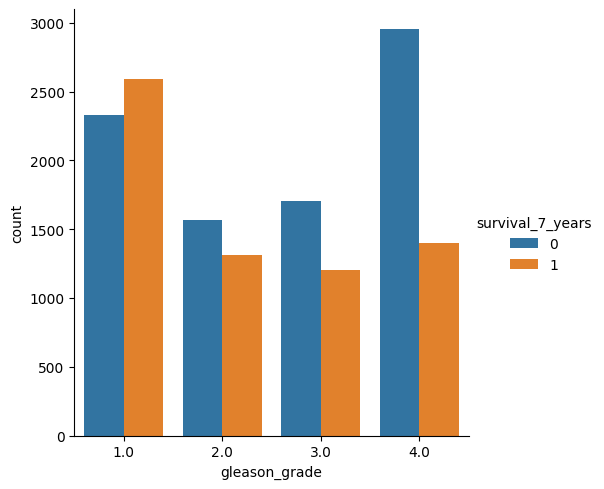

In [151]:
target_var = 'survival_7_years'
cat_vars = ['stage', 'race', 'Obesity', 'first_degree_history', 'previous_cancer','smoker', 
            'rd_thrpy','h_thrpy', 'chm_thrpy','cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 
            'O01', 'O08','O09', 'O10', 'P01', 'P02', 'P03', 'S10', 'U05', 'age_group', 
            'gleason_grade']
# Loop over categorical variables and create plots
for var in cat_vars:
    sns.catplot(x=var, hue=target_var, data=df_c, kind='count')

In [152]:
df_c.isna().sum()

diagnosis_date             0
stage                      0
race                     165
Obesity                 2567
first_degree_history    1586
previous_cancer         1586
smoker                  1586
tumor_diagnosis          303
rd_thrpy                   0
h_thrpy                    0
chm_thrpy                  0
cry_thrpy                  0
brch_thrpy                 0
rad_rem                    0
multi_thrpy                0
O01                        0
O08                        0
O09                        0
O10                        0
P01                        0
P02                        0
P03                        0
S10                        0
U05                        0
survival_7_years           0
age_group                748
gleason_grade            320
dtype: int64

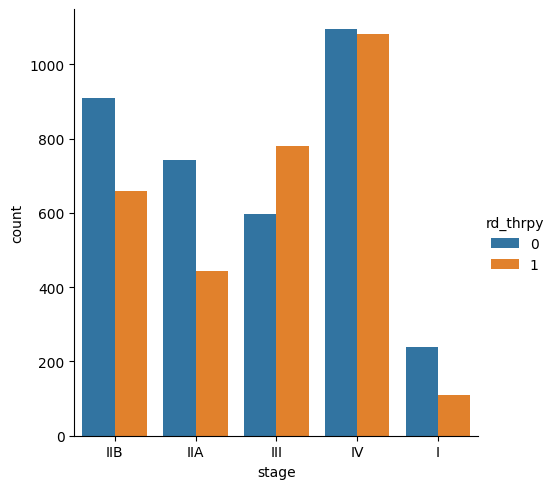

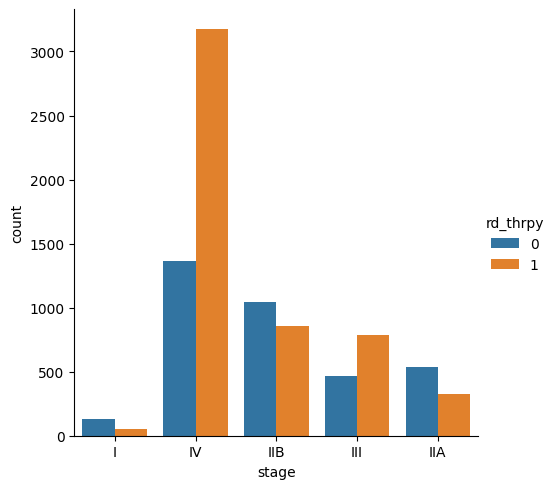

In [153]:
# Set the names of the three categorical columns
cat_col1 = 'rd_thrpy'
cat_col2 = 'stage'
cat_col3 = 'survival_7_years'

df_c1 = df_c[df_c[cat_col3] != 0]
df_c0 = df_c[df_c[cat_col3] == 0]

sns.catplot(x=cat_col2, hue=cat_col1, data=df_c1, kind='count')
sns.catplot(x=cat_col2, hue=cat_col1, data=df_c0, kind='count')

In [154]:
df_c.columns

Index(['diagnosis_date', 'stage', 'race', 'Obesity', 'first_degree_history',
       'previous_cancer', 'smoker', 'tumor_diagnosis', 'rd_thrpy', 'h_thrpy',
       'chm_thrpy', 'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01',
       'O08', 'O09', 'O10', 'P01', 'P02', 'P03', 'S10', 'U05',
       'survival_7_years', 'age_group', 'gleason_grade'],
      dtype='object')

In [155]:
df_c.isna().sum()

diagnosis_date             0
stage                      0
race                     165
Obesity                 2567
first_degree_history    1586
previous_cancer         1586
smoker                  1586
tumor_diagnosis          303
rd_thrpy                   0
h_thrpy                    0
chm_thrpy                  0
cry_thrpy                  0
brch_thrpy                 0
rad_rem                    0
multi_thrpy                0
O01                        0
O08                        0
O09                        0
O10                        0
P01                        0
P02                        0
P03                        0
S10                        0
U05                        0
survival_7_years           0
age_group                748
gleason_grade            320
dtype: int64

In [156]:
df_f = df_c[['stage', 'race', 'Obesity', 'first_degree_history','previous_cancer', 
            'smoker', 'tumor_diagnosis', 'rd_thrpy', 'h_thrpy','chm_thrpy', 'cry_thrpy', 
            'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01','O08', 'O09', 'O10', 'P01', 
            'P02', 'P03', 'S10', 'U05','survival_7_years', 'age_group', 'gleason_grade']]

def cancer_stages_bin(stage):
    if stage == "I":
        return 1 
    elif stage == "IIB":
        return 2
    elif stage == "IIA":
        return 2
    elif stage == "III":
        return 3
    elif stage == "IV":
        return 4
    
df_f['stage'] = df_f['stage'].apply(cancer_stages_bin)

df_f.fillna(-1, inplace = True)

/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/1672577555.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['stage'] = df_f['stage'].apply(cancer_stages_bin)
/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/1672577555.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f.fillna(-1, inplace = True)


In [157]:
df_f.dtypes

stage                     int64
race                    float64
Obesity                 float64
first_degree_history    float64
previous_cancer         float64
smoker                  float64
tumor_diagnosis         float64
rd_thrpy                  int64
h_thrpy                   int64
chm_thrpy                 int64
cry_thrpy                 int64
brch_thrpy                int64
rad_rem                   int64
multi_thrpy               int64
O01                       int64
O08                       int64
O09                       int64
O10                       int64
P01                       int64
P02                       int64
P03                       int64
S10                       int64
U05                       int64
survival_7_years          int64
age_group               float64
gleason_grade           float64
dtype: object

In [158]:
df_f = df_f.drop('previous_cancer', axis = 1)

In [159]:
X = df_f.drop('survival_7_years', axis=1) # features
y = df_f['survival_7_years'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [161]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6321490467937608


In [162]:
from sklearn.inspection import permutation_importance


# compute permutation feature importance
result = permutation_importance(svm_model, X_train, y_train, n_repeats=10, random_state=0)

# print the feature importances
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_train.columns[i]:<8} {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

stage    0.036 +/- 0.003
gleason_grade 0.029 +/- 0.003
rd_thrpy 0.012 +/- 0.002
U05      0.008 +/- 0.002
rad_rem  0.006 +/- 0.001
S10      0.005 +/- 0.001
tumor_diagnosis 0.003 +/- 0.001
P01      0.002 +/- 0.001
chm_thrpy 0.001 +/- 0.001
h_thrpy  0.001 +/- 0.001
P02      0.001 +/- 0.001
P03      0.000 +/- 0.000
O09      0.000 +/- 0.000
O01      0.000 +/- 0.000
O10      0.000 +/- 0.000
O08      -0.000 +/- 0.000
brch_thrpy -0.000 +/- 0.001
age_group -0.000 +/- 0.000
cry_thrpy -0.000 +/- 0.000
multi_thrpy -0.001 +/- 0.001
first_degree_history -0.001 +/- 0.001
smoker   -0.001 +/- 0.001
race     -0.001 +/- 0.001
Obesity  -0.002 +/- 0.000


In [44]:
import joblib
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, auc, mean_squared_error, average_precision_score, confusion_matrix, f1_score, precision_score, precision_recall_curve, recall_score
from sklearn.metrics import roc_curve, mean_absolute_error, r2_score, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [45]:
rf = RandomForestClassifier(n_estimators=300, random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5870883882149047


In [445]:
# # Tuning
# model = SVC()
# kernel = ['linear']
# # kernel = ['linear', 'poly', 'rbf', 'sigmoid']
# C = [0.01, 0.1, 1, 10]
# gamma = [1, 0.1, 0.01]
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X_train, y_train)
# grid_result
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [46]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5576256499133448


In [47]:
export_graphviz(dt, out_file='tree.dot', feature_names=X.columns, class_names=['0', '1'], filled=True)


Trying to predict on test data

In [48]:
test_df.columns

Index(['id', 'diagnosis_date', 'gleason_score', 't_score', 'n_score',
       'm_score', 'stage', 'age', 'race', 'height', 'weight', 'BMI', 'Obesity',
       'family_history', 'first_degree_history', 'previous_cancer', 'smoker',
       'side', 'tumor_diagnosis', 'rd_thrpy', 'h_thrpy', 'chm_thrpy',
       'cry_thrpy', 'brch_thrpy', 'rad_rem', 'multi_thrpy', 'survival_1_year',
       'O01', 'O08', 'O09', 'O10', 'O11', 'P01', 'P02', 'P03', 'S04', 'S07',
       'S10', 'U01', 'U02', 'U03', 'U05', 'U06', 'survival_7_years'],
      dtype='object')

In [52]:
df_score = pd.DataFrame()
df_score = test_df[['gleason_score','stage', 'age', 'race','Obesity',
                    'first_degree_history', 'smoker', 'tumor_diagnosis', 
                    'rd_thrpy', 'h_thrpy', 'chm_thrpy','cry_thrpy', 'brch_thrpy', 
                    'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10', 'O11', 
                    'P01', 'P02', 'P03', 'S04', 'S07','S10', 'U01', 'U02', 'U03', 
                    'U05', 'U06']]

In [53]:
df_score['age_group'] = df_score['age'].apply(replace_age)
df_score['gleason_grade'] = df_score['gleason_score'].apply(replace_gleason_score)
df_score['first_degree_history'] = df_score['first_degree_history'].apply(replace_first_degree_history)

/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/3695784604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['age_group'] = df_score['age'].apply(replace_age)
/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/3695784604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['gleason_grade'] = df_score['gleason_score'].apply(replace_gleason_score)
/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/3695784604.py:3: SettingWithCopyWarning: 
A value

In [54]:
df_score.head(5)

,gleason_score,stage,age,race,Obesity,first_degree_history,smoker,tumor_diagnosis,rd_thrpy,h_thrpy,...,S04,S07,S10,U01,U02,U03,U05,U06,age_group,gleason_grade
0,8.0,III,79.0,4.0,0.0,NaN,NaN,44.0,1,1,...,0,0,1,1,1,0,0,0,4.0,3.0
1,10.0,IIB,84.0,2.0,0.0,0.0,0.0,93.0,1,0,...,0,1,0,1,1,0,0,0,4.0,4.0
2,6.0,IV,NaN,4.0,0.0,0.0,0.0,35.0,0,0,...,0,1,0,0,0,0,0,1,NaN,1.0
3,7.0,IV,73.0,4.0,0.0,0.0,0.0,40.0,1,0,...,0,1,0,0,0,0,0,0,3.0,2.0
4,6.0,IIA,81.0,1.0,NaN,0.0,0.0,53.0,0,0,...,0,0,0,1,0,1,0,1,4.0,1.0


In [55]:
df_score['stage'] = df_score['stage'].apply(cancer_stages_bin)

/var/folders/wy/y81s23xx1qdf2640d4mj4g500000gn/T/ipykernel_35320/3886208042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score['stage'] = df_score['stage'].apply(cancer_stages_bin)


In [56]:
df_score.dtypes

gleason_score           float64
stage                     int64
age                     float64
race                    float64
Obesity                 float64
first_degree_history    float64
smoker                  float64
tumor_diagnosis         float64
rd_thrpy                  int64
h_thrpy                   int64
chm_thrpy                 int64
cry_thrpy                 int64
brch_thrpy                int64
rad_rem                   int64
multi_thrpy               int64
O01                       int64
O08                       int64
O09                       int64
O10                       int64
O11                       int64
P01                       int64
P02                       int64
P03                       int64
S04                       int64
S07                       int64
S10                       int64
U01                       int64
U02                       int64
U03                       int64
U05                       int64
U06                       int64
age_grou

In [57]:
df_score = df_score.drop(['gleason_score','age'], axis = 1)

In [65]:
df_f.columns

Index(['stage', 'race', 'Obesity', 'first_degree_history', 'smoker',
       'tumor_diagnosis', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy',
       'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10',
       'P01', 'P02', 'P03', 'S10', 'U05', 'survival_7_years', 'age_group',
       'gleason_grade'],
      dtype='object')

In [66]:
df_score.columns

Index(['stage', 'race', 'Obesity', 'first_degree_history', 'smoker',
       'tumor_diagnosis', 'rd_thrpy', 'h_thrpy', 'chm_thrpy', 'cry_thrpy',
       'brch_thrpy', 'rad_rem', 'multi_thrpy', 'O01', 'O08', 'O09', 'O10',
       'O11', 'P01', 'P02', 'P03', 'S04', 'S07', 'S10', 'U01', 'U02', 'U03',
       'U05', 'U06', 'age_group', 'gleason_grade'],
      dtype='object')

In [70]:
df_score = df_score.drop(['O11','S04','S07','U01','U02','U03','U06'], axis = 1)

KeyError: "['O11', 'S04', 'S07', 'U01', 'U02', 'U03', 'U06'] not found in axis"

In [71]:
df_score.fillna(-1, inplace = True)

In [72]:
score_pred = svm_model.predict(df_score)

In [74]:
score_pred = pd.DataFrame(score_pred, columns = ['survival_7_years'])

In [75]:
score_pred

,survival_7_years
0,0
1,0
2,1
3,0
4,1
...,...
11526,0
11527,0
11528,0
11529,0


In [77]:
pred1 = score_pred[score_pred.survival_7_years == 0]
pred0 = score_pred[score_pred.survival_7_years != 0]

In [78]:
print(pred1.shape)

(7418, 1)


In [87]:
print(pred0.shape)

(4113, 1)


In [107]:
score_pred.isna().sum()

survival_7_years    0
dtype: int64

In [108]:
group2_score = pd.read_csv('participant_files/(name)_score.csv')

In [109]:
group2_score = group2_score.drop(['survival_7_years'], axis = 1)

In [110]:
group2_score.isna().sum()

id                         0
diagnosis_date             0
gleason_score            239
t_score                    0
n_score                    0
m_score                    0
stage                      0
age                      648
race                     121
height                  1043
weight                  1041
family_history          1171
first_degree_history    1171
previous_cancer         1171
smoker                  1171
side                       0
tumor_diagnosis          210
tumor_6_months          7555
tumor_1_year            1604
psa_diagnosis           1029
psa_6_months            7146
psa_1_year              1915
tea                     1171
symptoms                 324
rd_thrpy                   0
h_thrpy                    0
chm_thrpy                  0
cry_thrpy                  0
brch_thrpy                 0
rad_rem                    0
multi_thrpy                0
survival_1_year         5713
dtype: int64

In [112]:
group2_score = pd.concat([group2_score, score_pred], axis = 1)

In [113]:
group2_score

,id,diagnosis_date,gleason_score,t_score,n_score,m_score,stage,age,race,height,...,symptoms,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
0,20001,Oct-05,8.0,T3b,N0,M0,III,79.0,4.0,68.0,...,"U01,U02,S10",1,1,1,0,0,0,1,NaN,0
1,20002,Jun-02,10.0,T2c,N0,M0,IIB,84.0,2.0,70.0,...,"U01,U02,S07",1,0,0,1,0,0,1,NaN,0
2,20003,Mar-04,6.0,T4,N0,M0,IV,NaN,4.0,68.0,...,"U06,S07,O11",0,0,1,1,0,0,1,NaN,1
3,20004,Oct-03,7.0,T4,N1,M1a,IV,73.0,4.0,69.0,...,"S07,P03",1,0,1,0,1,0,1,0.0,0
4,20005,Mar-06,6.0,T1b,N0,M0,IIA,81.0,1.0,69.0,...,"U01,U03,U06,O11",0,0,1,1,0,0,1,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,31527,Sep-06,10.0,T4,N1,M0,IV,80.0,4.0,70.0,...,"U01,U02,U06,S07",0,1,1,1,0,0,1,1.0,0
11527,31528,Nov-02,7.0,T4,N1,M0,IV,73.0,3.0,69.0,...,"U01,U02,U03,U06",0,1,1,0,0,0,1,1.0,0
11528,31529,Oct-02,10.0,T4,N0,M0,IV,62.0,4.0,NaN,...,"U01,U03,U05,S04",1,0,1,0,0,0,1,1.0,0
11529,31530,Nov-01,10.0,T1a,N0,M0,IIB,78.0,4.0,67.0,...,U02,1,1,1,1,0,1,1,NaN,0


In [114]:
group2_score.isna().sum()

id                         0
diagnosis_date             0
gleason_score            239
t_score                    0
n_score                    0
m_score                    0
stage                      0
age                      648
race                     121
height                  1043
weight                  1041
family_history          1171
first_degree_history    1171
previous_cancer         1171
smoker                  1171
side                       0
tumor_diagnosis          210
tumor_6_months          7555
tumor_1_year            1604
psa_diagnosis           1029
psa_6_months            7146
psa_1_year              1915
tea                     1171
symptoms                 324
rd_thrpy                   0
h_thrpy                    0
chm_thrpy                  0
cry_thrpy                  0
brch_thrpy                 0
rad_rem                    0
multi_thrpy                0
survival_1_year         5713
survival_7_years           0
dtype: int64

In [115]:
group2_score.to_csv('group2_score.csv', index=False)